In [29]:
from cadCAD.configuration import append_configs
from cadCAD.configuration import Configuration
from cadCAD.configuration.utils import config_sim
%matplotlib inline
import pandas as pd

In [30]:
# List of all the state variables in the system and their initial values
initial_conditions = {
    'box_A': 10, # as per the description of the example, box_A starts out with 10 marbles in it
    'box_B': 0 # as per the description of the example, box_B starts out empty
}

# State update functions
def update_A(params, step, sL, s, _input):
    y = 'box_A'
    add_to_A = 0
    if (s['box_A'] > s['box_B']):
        add_to_A = -1
    elif (s['box_A'] < s['box_B']):
        add_to_A = 1
    x = s['box_A'] + add_to_A
    return (y, x)

def update_B(params, step, sL, s, _input):
    y = 'box_B'
    add_to_B = 0
    if (s['box_B'] > s['box_A']):
        add_to_B = -1
    elif (s['box_B'] < s['box_A']):
        add_to_B = 1
    x = s['box_B'] + add_to_B
    return (y, x)

# In the Partial State Update Blocks, the user specifies if state update functions will be run in series or in parallel
partial_state_update_blocks = [
    { 
        'policies': { # We'll ignore policies for now
        },
        'variables': { # The following state variables will be updated simultaneously
            'box_A': update_A,
            'box_B': update_B
        }
    }
]

simulation_parameters = {
    'T': range(10),
    'N': 1,
    'M': {}
}

# The configurations above are then packaged into a `Configuration` object
config = Configuration(user_id="",
                       initial_state=initial_conditions, #dict containing variable names and initial values
                       partial_state_update_blocks=partial_state_update_blocks, #dict containing state update functions
                       sim_config=simulation_parameters #dict containing simulation parameters
                      )


In [31]:
%%capture
from cadCAD.engine import ExecutionMode, ExecutionContext, Executor
exec_mode = ExecutionMode()
exec_context = ExecutionContext(exec_mode.single_proc)
executor = Executor(exec_context, [config]) # Pass the configuration object inside an array
raw_result, ten1, ten2 = executor.execute()

In [32]:
ten2

[{'user_id': '', 'session_id': 0, 'simulation_id': 0, 'run_id': 1}]

In [33]:
import pandas as pd
df = pd.DataFrame(raw_result)
df.set_index(['run', 'timestep', 'substep'])

box_A  box_B  simulation
run timestep substep                          
1   0        0           10      0           0
2   1        1            9      1           0
    2        1            8      2           0
    3        1            7      3           0
    4        1            6      4           0
    5        1            5      5           0
    6        1            5      5           0
    7        1            5      5           0
    8        1            5      5           0
    9        1            5      5           0
    10       1            5      5           0

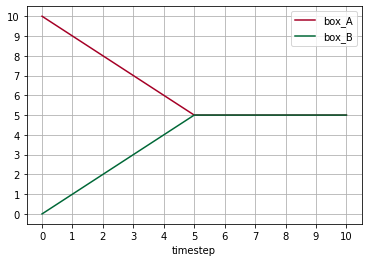

In [34]:
df.plot('timestep', ['box_A', 'box_B'], grid=True, 
        colormap = 'RdYlGn',
        xticks=list(df['timestep'].drop_duplicates()), 
        yticks=list(range(1+(df['box_A']+df['box_B']).max())));

In [ ]:
exec_mode.